In [42]:
from skimage import data, segmentation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2

import os
import skimage.io as sio
import tqdm
import datetime
import copy

In [108]:
# img = data.astronaut()
path = '/home/saiamrit/Documents/BSR_bsds500/BSR/BSDS500/data/images/test/'
img = cv2.imread(path + '285022.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
w, h = int(img.shape[0]/3), int(img.shape[1]/3)
# img = cv2.resize(img, (h, w))

# labels = segmentation.slic(img, compactness=10, n_segments=500, start_label=1)
# labels = segmentation.slic(img, compactness=10, n_segments=500, start_label=1)
print(img.shape)

(321, 481, 3)


In [109]:
from src.segment.watershed import watershed_segmentation

In [110]:
# labels = watershed_segmentation(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
labels = segmentation.slic(img, compactness=10, n_segments=300, start_label=1)

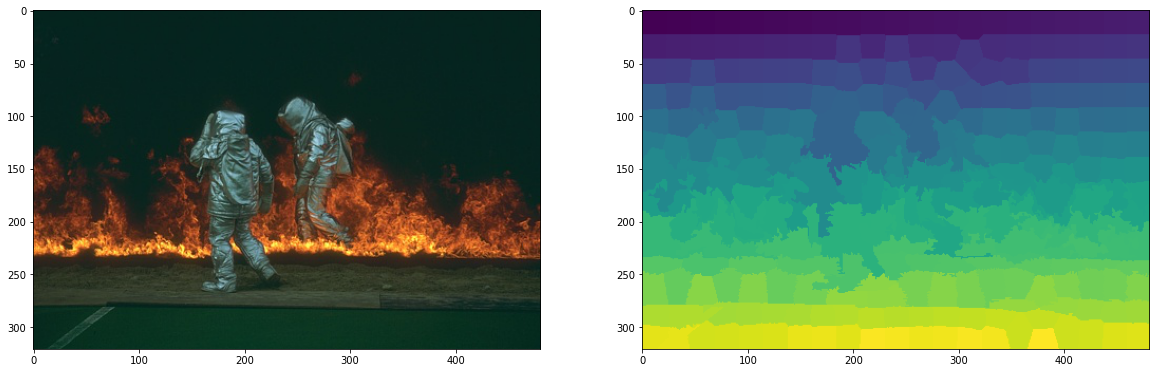

In [111]:
plt.figure(0, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(labels)

plt.show()

In [112]:
len(np.unique(labels))

254

In [113]:
from src.rag import RAG
from src.nng import NNG
from src.utils import visualize_rag, quantize_image, visualize_nng

In [114]:
from src.sprt import compute_averageColor, compute_conditionalProbability, compute_averageColor, sample_from_region, sprt_test

In [115]:
from src.region_merging import RegionMerging, NNGRegionMerging

# Start Region Merging

In [116]:
import time

  0%|          | 0/100 [00:00<?, ?it/s]

0:00:01.393496
Number of initial regions:  254


 40%|████      | 40/100 [01:18<01:57,  1.96s/it]


Number of final regions:  14
78.35071086883545


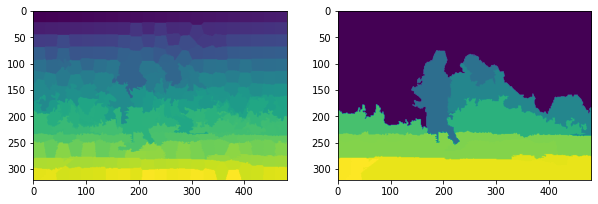

In [117]:
drm = NNGRegionMerging(img, labels, lambda1=0.9, lambda2=0.1)
start = time.time()
# start = datetime.datetime.now()
initial_labels = drm.get_labels()
initial_graph = copy.deepcopy(drm.graph)
initial_nng_graph = copy.deepcopy(drm.nng)
print("Number of initial regions: ", len(drm.graph.nodes))

drm.run_region_merging(100)

new_labels = drm.get_labels()
print("Number of final regions: ", len(drm.graph.nodes))
# print(datetime.datetime.now() - start)
end = time.time()
print(end-start)


# Visualize
plt.figure(0, figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(initial_labels)
plt.subplot(1, 2, 2)
plt.imshow(new_labels)
plt.show()

In [118]:
from src.utils import visualize_nng, visualize_rag
save_path = '/home/saiamrit/project-noisypixel/output'

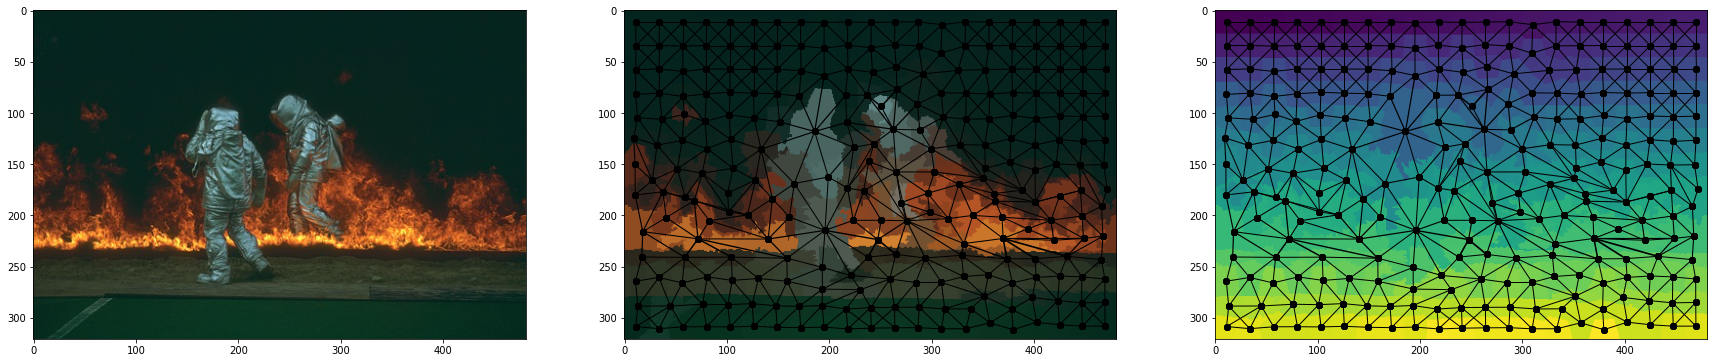

In [119]:
im1 = visualize_rag(img, initial_labels, initial_graph, method = 'rag', time = 'initial', path = save_path)

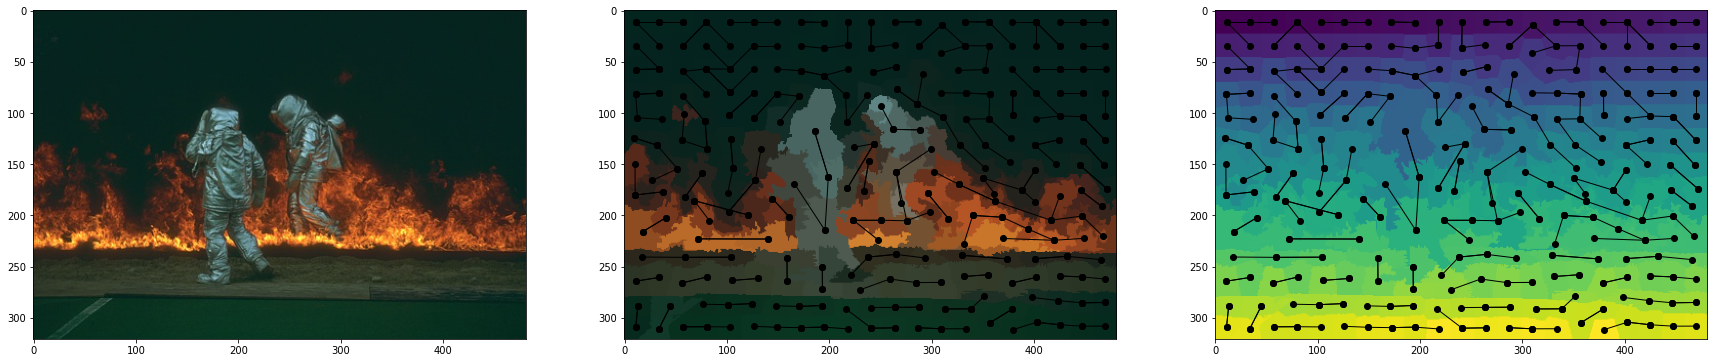

In [120]:
i = visualize_nng(img, initial_labels, initial_nng_graph, method = 'nng', time = 'initial', path = save_path)

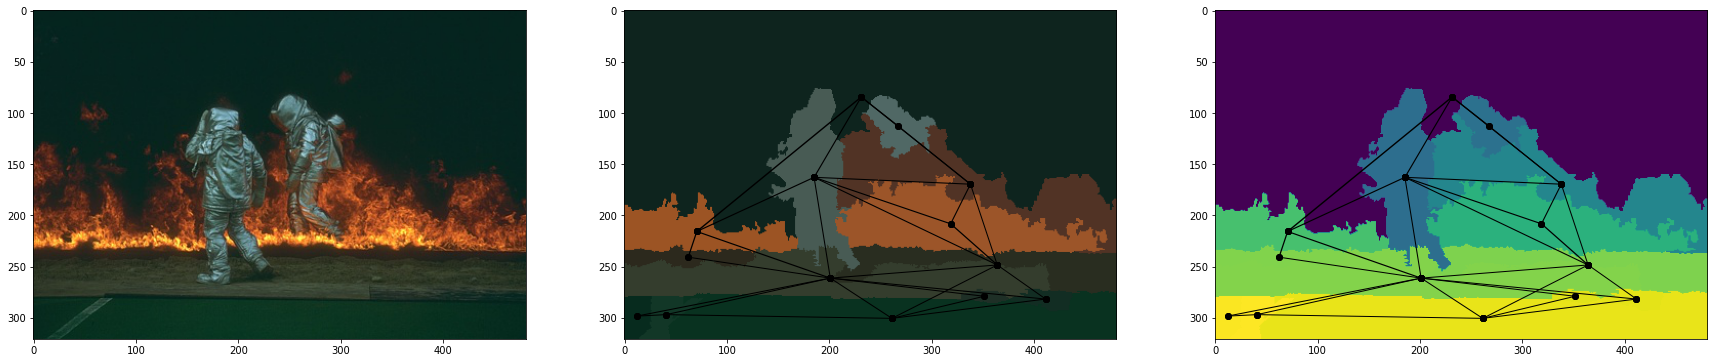

In [121]:
im2 = visualize_rag(img, new_labels, drm.graph, method = 'rag', time = 'final', path = save_path)

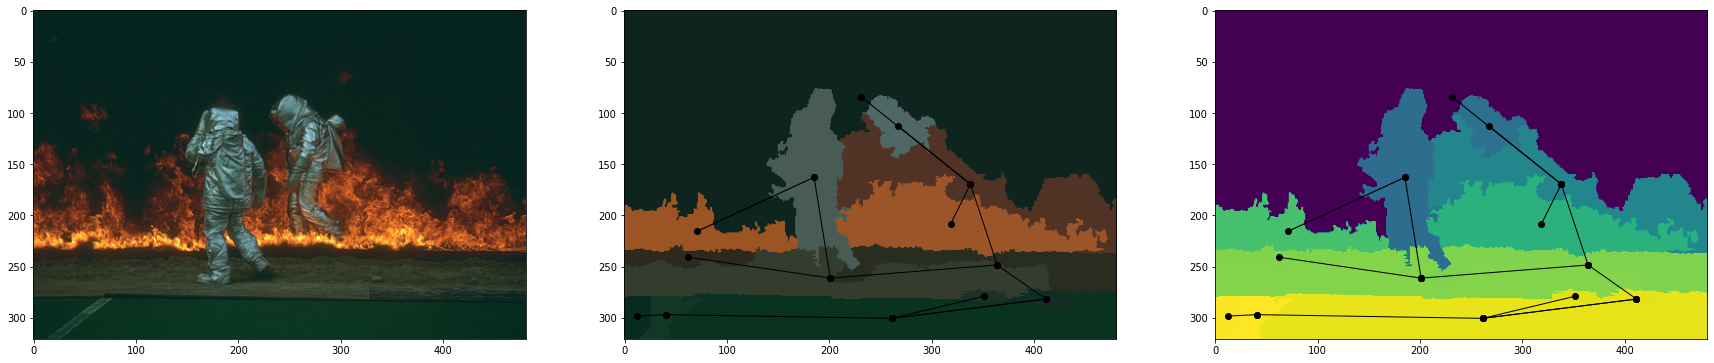

In [122]:
i = visualize_nng(img, new_labels, drm.nng, method = 'nng', time = 'final', path = save_path)

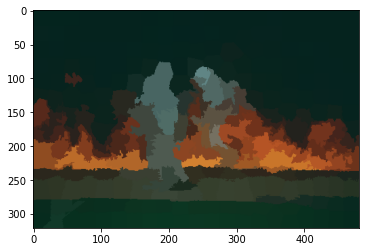

In [123]:
plt.imshow(im1)
plt.show()
plt.imsave('initial.png',im1)

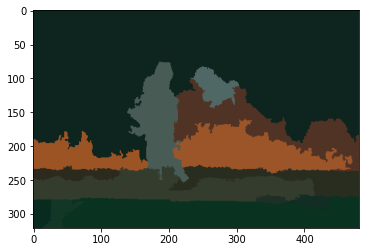

In [124]:
plt.imshow(im2)
plt.show()
plt.imsave('final.png',im2)